In [37]:
# 1. 필요한 라이브러리

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [39]:
# 2. 데이터 생성

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42)

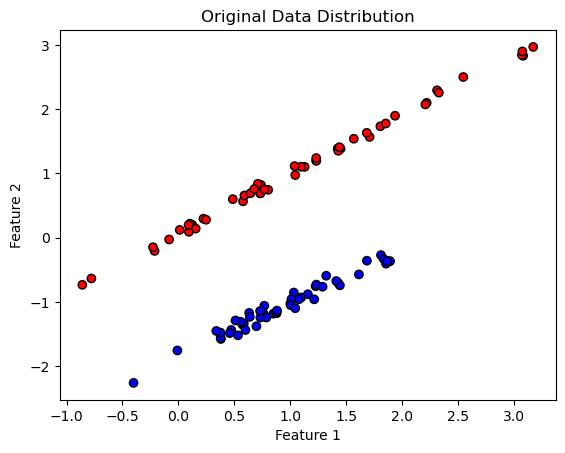

In [41]:
# 3. 데이터 분포 시각화

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title('Original Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [43]:
# 4. Feature Scaling (표준화 전처리)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# 5. 모델 학습

model = LogisticRegression()
model.fit(X_scaled, y)

LogisticRegression()

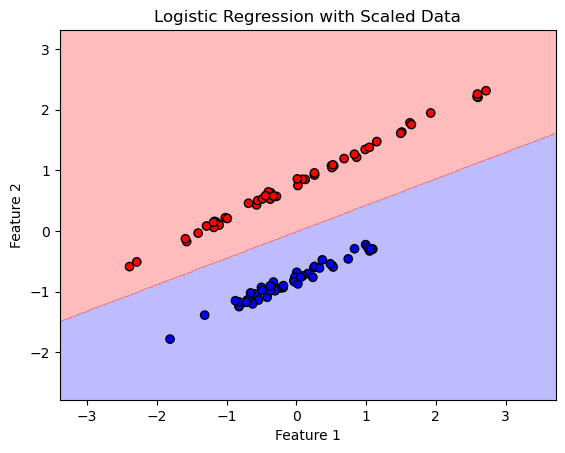

In [51]:
# 6. 결정 경계 시각화

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

#데이터 범위(최소,최댓값 찾아서)보다 약간 넓게 영역을 잡아서(+1) 그래프가 잘 보이게 만들기

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500))

#np.linspace(a, b, N):	a부터 b까지 N개의 점 만들기
#np.meshgrid(x, y):	2D 평면 그리드 생성
# → Feature 공간 위에 아주 촘촘한 점(x, y 좌표)을 만들어 놓음

grid = np.c_[xx.ravel(), yy.ravel()]

# xx.ravel():	x좌표 펼치기 (1D로 만듦)
# yy.ravel():	y좌표 펼치기 (1D로 만듦)
# np.c_[]:	두 데이터를 열 방향으로 붙이기
# → 지금까지 만든 모든 좌표를 "하나의 데이터 세트"로 변환 (머신러닝 모델 입력 형태로 만들기)

preds = model.predict(grid).reshape(xx.shape)

# → grid 좌표에 있는 각 점들이 0인지 1인지 예측해서 결과를 2D 형태로 되돌림 (그래프 그리기 용도)

plt.contourf(xx, yy, preds, alpha=0.3, cmap='bwr') 

# → 모델이 예측한 "결정영역"을 색깔로 구분해서 보여줌 (어느 영역은 0, 어느 영역은 1로 예측하는지)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr', edgecolors='k')

# → 실제 데이터 점이 어디 있는지 시각화

plt.title('Logistic Regression with Scaled Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()